In [2]:
import pandas as pd, matplotlib.pyplot as plt, numpy as np, os

In [3]:
os.chdir(os.path.join('..','data'))
df = pd.read_csv(r'marathon.csv',low_memory=False)

In [4]:
df.info()


# During my time on the course, the chance
# of overtaking a runner, or being overtaken, is proportional to the difference
# in our speeds. I am more likely to catch a slow runner, and more likely to be
# caught by a fast runner. But runners at the same speed are unlikely to see
# each other.
# Write a function called ObservedPmf that takes a Pmf representing the actual
# distribution of runners’ speeds, and the speed of a running observer, and
# returns a new Pmf representing the distribution of runners’ speeds as seen
# by the observer

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1596 entries, 0 to 1595
Data columns (total 1 columns):
speed    1596 non-null float64
dtypes: float64(1)
memory usage: 12.5 KB


In [6]:
df.head()

,speed
0,12.09
1,11.73
2,11.73
3,11.46
4,11.28


(6.841353383458628, 1.156108941697621)

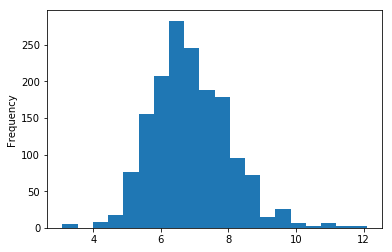

In [11]:
# plot the actual distribution
df['speed'].plot.hist(bins=20)
df['speed'].mean(), df['speed'].std()

<Container object of 82 artists>

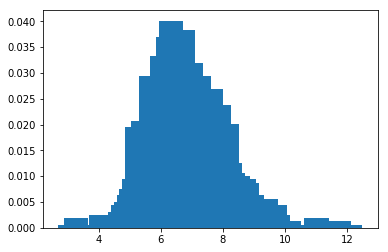

In [39]:
# pmf for the actual distribution
def calc_pmf_df(key,df):
    freq = df[key].value_counts().sort_index()
    freq_sum = sum(freq)
    pmf = freq/freq_sum
    return pmf.index,pmf.values

x,y=calc_pmf('speed',df)
plt.bar(x,y)

In [54]:
from collections import defaultdict

# calculate the mean of the observers

series = df['speed'].value_counts()
total = 0
observers= 0
new_d = defaultdict()
for index,value in series.iteritems():
    new_d[index] = index*value
    total += index*value*index
    observers += index*value
    
total/observers



7.0365999010880325

Mean =  7.036599901088034  | standard deviation =  1.198290879052728


<Container object of 82 artists>

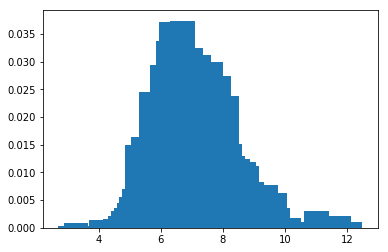

In [55]:
def calc_pmf(dictionary):
    freq = dictionary.values()
    freq_sum = sum(freq)
    pmf = [x/freq_sum for x in freq]
    return list(dictionary.keys()),pmf

def calc_mean_std(dictionary):
    x,y = calc_pmf(dictionary)
    df = pd.DataFrame({'speed':x,'prob':y})
    mean = sum((df['speed'])*(df['prob']))
    std = math.sqrt(sum(df['prob']*(df['speed']-mean)**2))
    print('Mean = ',mean,' | standard deviation = ',std)
    return df

df_observed = calc_mean_std(new_d)
plt.bar(df_observed['speed'],df_observed['prob'])